Finding the root of an equation is a common problem in mathematics. What is the value of x in order to satisfy $f(x) = 0$?
As you probably rememver the quadratic polynomial $ ax^2+bx+c=0 $ is given by the quadratic formula.

$$
x = \frac{-b \pm \sqrt{b^2-4a}}{2a}
$$

For the function $f(x) = x^2−9$ it is obvious that the roots are 3 and -3. If we want to use python to check this we can use sympy to do so. Sympy will find the answer analytically and this is also how we would solve this on a piece of paper.

In [1]:
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
import matplotlib.pyplot as plt

x = Symbol('X')
solve(x**2 - 9, x)

[-3, 3]

However, there are some problems with this method for finding roots because:
- Only formulas exist up to fourth degree polynomials and they are not used often. (abel_ruffi)
- Finding the root of transcendental equations can be hard.

Numerical mathematics will give us some extra tools to find the roots for harder problems.
In this chapter we will discuss the following methods:
- Bisection method
- Newton's method
- Secant method
- Regula falsi
- Dekker-Brent

<h1> 1. Bisection method </h1>

The Intermediate Value Theorem states:

If $f(x)$ is a continuous function between the real numbers a and b, and $sign(f(a)) \neq sign(f (b))$,
then there must be an u for which, $a < u < b $ and $ f(u) = 0$. This means that u is the root that we are looking for since.

The bisection method uses the intermediate value theorem in an iterative way to find roots. Assume that we have an open interval [a,b], where $a < b$ and a continuous function $f(x)$. Also the signs of $f(a)$ and $f(b)$ are not equal, then there must be a root in the open interval $(a, b)$. The midpoint becomes $m = b + \frac{a}{2}$. 

This leaves us with three options:
1. $f(m) = 0$, m is the root or it is close enough to the root according to the accuracy.
2. $f(m) > 0$, m is a better value for the left bound, update a.
3. $f(m) < 0$, m is a better value for the right bound, update b.

We keep repeating this process until we reach option one.
Let's do a few steps of this process with $f(x) = 2x^3+x+1$

Pick a and b such that $f(a)$ and $f(b)$ have opposite signs.
If we pick $a = 1$ and $b = -2$ we get:

$f(1) = 2(1)^3+(1)+1 = 6$ and $f(-2) = 2(-2)^3+(-2)+1 = - 17$

The midpoint becomes:

$-2 + \frac{1}{2} = -0,5$

$f(m) = 2(-0,5)^3+(-0,5)+1 = 0.25$

$f(m)$ is positive this means that the new value of a becomes 0.25, otherwise the signs of $f(a)$ and $f(b)$ will be equal.

$f(1) = 2(0.25)^3+(0.25)+0.25 = 6$ and $f(-2) = 2(-2)^3+(-2)+1 = - 17$

$-2 + 0.25 / 2 = -0,875$

We repeat this process until we have n amount of iterations or we are satisfied with the accuracy. In short, we have this theorem that tell us that if a certain statement holds then we have the root between a and b. This algorithm allows us to keep decreasing the range of a and b, until we reach a small enough interval. In this interval the middle point is the root.

Let's implement the bisection method in python and use it to solve:
$$
f(x) = x^3-x-2
$$

In [2]:
def f(x):
    return(x**3 - x - 2)

def bisection(f, a, b, tol, max_iter):
    number_of_iterations = 0
    while number_of_iterations <= max_iter:
        c = (a + b)/2
        print(a,b,c)
        if f(c) == 0 or abs((b - a)/2) < tol:
            return c
        number_of_iterations += 1
        if np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
    print("max iter exceeded", "Convergence around:", c)
    
bisection(f, -1, 5,  0.0000001, 20)

# put func_f as parameter in bisection function
# print out whole list

-1 5 2.0
-1 2.0 0.5
0.5 2.0 1.25
1.25 2.0 1.625
1.25 1.625 1.4375
1.4375 1.625 1.53125
1.4375 1.53125 1.484375
1.484375 1.53125 1.5078125
1.5078125 1.53125 1.51953125
1.51953125 1.53125 1.525390625
1.51953125 1.525390625 1.5224609375
1.51953125 1.5224609375 1.52099609375
1.52099609375 1.5224609375 1.521728515625
1.52099609375 1.521728515625 1.5213623046875
1.5213623046875 1.521728515625 1.52154541015625
1.5213623046875 1.52154541015625 1.521453857421875
1.5213623046875 1.521453857421875 1.5214080810546875
1.5213623046875 1.5214080810546875 1.5213851928710938
1.5213623046875 1.5213851928710938 1.5213737487792969
1.5213737487792969 1.5213851928710938 1.5213794708251953
1.5213794708251953 1.5213851928710938 1.5213823318481445
max iter exceeded Convergence around: 1.5213823318481445


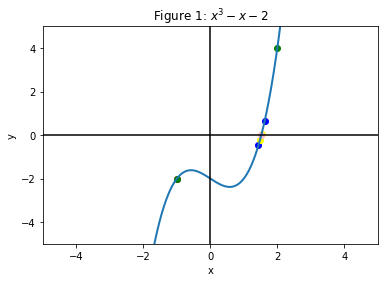

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plot_range = np.arange(-10, 10.0, 0.01)

ax = plt.subplot()
line, = plt.plot(plot_range, f(plot_range), lw=2)

# Take some of the results from the Raphson method
all_points = [(-1, 5),(-1, 2.0),(1.4375, 1.625), (1.484375, 1.53125), (1.5213794708251953, 1.5213851928710938)]
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
#plt.annotate("Point 1", (1, 4))

for v, points in enumerate(all_points):
    plt.scatter(points[0], f(points[0]), color = colors[v])
    plt.scatter(points[1], f(points[1]), color = colors[v])
    
plt.title("Figure 1: $x^3 - x - 2$")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.show()

# zeg dat als je dit in een editor runned dan kan je inzoomen.
# maak er maybe 1 waarin ik inzoem op het belangrijke stuk

Figure 1 shows the function $x^3-x-2$, and we have plotted some of the results from running the bisection function.
We plotted a few pair of the a and b values, as you can see the range decreases and they slowly converge to the root.
If you would run this code in an IDE you can zoom in further (it's not standard in jupyter and I was too lazy to implement it). Furthermore, you could also make the bisection function save the values and then you could plot them. However, I decided against this because I want to only add necessary stuff in the numerical method functions.

The final result was 1.5213823318481445, # zeg hier maybe iets over.

<h1> 2. Newton's method </h1>

This method also uses an iterative process, and for it to work the function f has to be differentiable.
Because we need to be able to calculate the slope at every point on the graph, if f is differentiable then this holds true.

$$
l(x) = f' (x_0) (x-x_0) + f(x_0)
$$

The tangent line $l$ is a linear function, and at $x_0$ $l$ and $f$ are the same. We can calculate $l(x) = 0$ easily because it is linear and this is an approximation to $f(x) = 0 $, which is the root. We can find zero of $l$ with:

$$
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

$x_1$ will be close to the root than $x_0$, and we can repeat this process we will calculate $x_2$:

$$
x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}
$$

We run the process until our tolerance and/or max iteration are met. Because we need the derivative it can be quiet difficult or expensive to use this method. However, the derivative can also be approximated by using the slope of a line. Then this method will be similar to the secant method, therefor let's assume that getting the derivative is not a problem.

We can solve $x^2-2$

In [4]:
def f(x):
    return (x**2 - 2)

def fprime(x):
    return (2*x)

def Raphson(f, fprime, initial_guess, epsilon, maxiter):
    solutionfound = False
    i = 0
    x = initial_guess
    while i < maxiter:
        if abs(fprime(x)) < epsilon:
            break
        x_1 = x - (f(x)/fprime(x))
        if abs(x_1 - x) <= epsilon:
            solutionfound = True
            break
        i += 1
        x = x_1
        print(x, x_1)
    if solutionfound == True:
        print("solution is:", x_1)
    else:
        print("Didn't converge") 
        
Raphson(f, fprime, 0.1, 1e-7, 20)

10.049999999999999 10.049999999999999
5.1245024875621885 5.1245024875621885
2.757392138419574 2.757392138419574
1.7413575804495918 1.7413575804495918
1.444943381958916 1.444943381958916
1.4145403301286927 1.4145403301286927
1.4142136001158032 1.4142136001158032
solution is: 1.4142135623730956


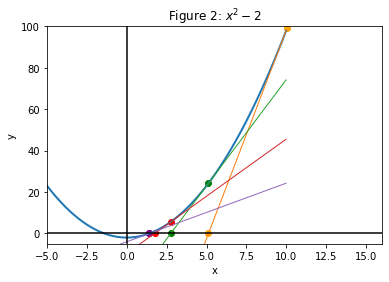

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plot_range = np.arange(-10, 10.0, 0.01)

def tangent_line(f, fp, x0, x1):
    return fp(x0)*(x1-x0)+f(x0)

ax = plt.subplot()
line, = plt.plot(plot_range, f(plot_range), lw=2)

# Take some of the results from the Raphson method
all_lines = [10.049999999999999, 5.1245024875621885, 2.757392138419574, 1.4142135623730956]

for line in all_lines:
    plt.plot(plot_range, tangent_line(f, fprime, line, plot_range), lw=1)

    
    
# Take some of the results from the Raphson method
all_points = [(10.049999999999999, 5.1245024875621885),
              (5.1245024875621885, 2.757392138419574),
              (2.757392138419574, 1.7413575804495918), 
              (1.4142136001158032, 1.4142135623730956)]
colors = np.array(["orange", "green", "red", "purple"])
#plt.annotate("Point 1", (1, 4))

for v, points in enumerate(all_points):
    plt.scatter(points[0], f(points[0]), color = colors[v])
    plt.scatter(points[1], 0, color = colors[v])
    
plt.title("Figure 2: $x^2 - 2$")
plt.xlabel('x')
plt.ylabel('y')  
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(-5, 100)
plt.xlim(-5, 16)
plt.show()

Figure 2 shows more clearly how the Raphson method worked. Remember we start initial guess $x_0 = 0.1$ then we calculate $x_1$.
This is when our tangent line crosses the x axes so $l(x) = 0$, this happens at $x_1 = 5.1245024875621885$. This value is then used for the second iteration. We calculate the tangent line at $x_1$ and we find $x_2$ at 2.757392138419574. We keep repeating this process and we can see that the tangent lines converge to f(x) = 0, which is the root and the goal of this method.

SOURCES: 
    https://en.wikipedia.org/wiki/Bisection_method
    https://en.wikipedia.org/wiki/Newton%27s_method

<h1> 3. Secant method </h1>

As mentioned before we don't have to calculate the derivatives, we can approximate them and this is what the secant method basically does.

Instead of using 

$$
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

We can approximate the derivative:

$$
f'(x) \approx \frac{f(x+h)-f(x)}{h}
$$

We can substitute x for $x_n$ and $ h = x_{n-1} - x_n$, this gives us

$$
f'(x_n) \approx \frac{f(x_{n-1})-f(x_n)}{x_{n-1}-x_{n}}
$$

We can substitute this for f'(x_n) in the first equation.


$$
x_{n+1} = x_n - \frac{x_n - x_{n-1}}{f(x_n)-f(x_{n-1})}f(x_n)
$$


In [6]:
# denk dat ie nog niet klopt maybe moet ik x1 en x0 omwisselen als 1 groter is dan de andere

def secant(f, x0, x1, tolerance, maxiter):
    i = 0
    while i < maxiter:
        if abs(f(x0)) > abs(f(x1)):
            x0, x1 = x1, x0
        if abs(f(x1)-f(x0)) <= tolerance*f(x1):
            #halt
            return x1
        x1 = x1 - ((x1-x0)/(f(x1)-f(x0))) * f(x1)
        i +=1
        print(x0, x1)
    return x1
    
def f(x):
    return (x**5 + x**3 + 3)

print(secant(f, -1, 1, 1e-7, 20))
print("0---------------------------------------")

-1 -1.5
-1 -1.0557491289198606
-1.0557491289198606 -1.114157827689621
-1.114157827689621 -1.1046154657060105
-1.1046154657060105 -1.1052894533146722
-1.1052894533146722 -1.1052985553987347
-1.1052985553987347 -1.1052985460060405
-1.1052985460060405 -1.1052985460061695
-1.1052985460061695 -1.1052985460061695
-1.1052985460061695
0---------------------------------------


In [7]:
# put graph for secant?

<h1>4. Regula falsi</h1>

This method combines the ideas from the secant and bisection method. 
lalallala
The method goes as follows: pick $x_0$ and $x_1$ in a way that $f(x_0)f(x_1) < 0$ because this implies that $x^* \in (x_0,x_1)$. Then $x_2$ is calculated as following:

$$x_2 = x_1 - \frac{f(x_1)(x_1-x_0)}{f(x_1)-f(x_0)} $$

Just like with the bisection method this leaves us with three options:
- $f(x_2) = 0$, and $x_2 = x^*$
- $f(x_0)f(x_2) < 0$, this means that $x^* \in (x_0, x_2)$
- $f(x_1)f(x_2) < 0$, then $x^* \in (x_2, x_1)$


https://en.wikipedia.org/wiki/Regula_falsi


$x^*$ is the root, maybe use u, like it was used in the bisection method.

In [8]:
def f(x):
    return (x**3 + 4*x**2 - 10)


#if np.sign(f(x_0)) == np.sign(f(x_2)):

def regula_falsi(f, a, b, ep, maxiter):
    i = 0
    x_0 = a
    x_1 = b
    if f(a) * f(b) > 0:
        return ("wrong initial guess")
    while i < maxiter:
        f_0 = f(x_0)
        f_1 = f(x_1) 
        x_2 = x_1 - (((x_1-x_0)*f(x_1))/(f(x_1)-f(x_0)))
        f_2 = f(x_2)
        if np.sign(f(x_0)) == np.sign(f(x_2)):
            x_0 = x_2
        else:
            x_1 = x_2
        if abs(f(x_2)) <= ep:
            #make sure i cut off depending on the precision
            return x_2
        i += 1
        print(x_2, i)
    return ("bish did not converge", x_2)
        
print(regula_falsi(f, 1, 2, 1e-6, 20))    

1.263157894736842 1
1.3388278388278387 2
1.358546341824779 3
1.3635474400420904 4
1.3648070318267802 5
1.3651237178843778 6
1.3652033036626001 7
1.365223301985543 8
1.3652283270255192 9
1.3652295896738464 10
1.365229906940572 11
1.3652299866604183


Small overview of methods
- define some functions
- run all methods
- graph the results in a cool way


In [9]:
#add loads of f(x) and check their values with my methods and those from scipy or w/e
# https://www.axians.nl/blog/het-zoeken-van-nulpunten-met-bisectie-en-regula-falsi/ check die graphs

<h1>Dekker-Brent</h1>

https://en.wikipedia.org/wiki/Brent%27s_method

http://reports.ias.ac.in/report/18641/implementation-of-brent-dekker-and-a-better-root-finding-method-and-brent-dekker-methods-parallelization

zeg maybe -1 ipv 0,1

Dekker-Brent algorithm is similar to regula falsi in the fact that is uses the bisection method and the secant method; however, it does so in a more efficient manor. Again we need the most recent $x$ values, these are given by $x_0$ and $x_1$. We also need an interval for which the root is in between a and b. We define $y_n$ as the most recent $x_n$ for which $f(y_{n})f(x_{n}) < 0 $. This implies that $u$ is between $x_n$ and $y_n$. We have three points given by $x_n, x_{n-1}, y_{n}$ and in the next iteration these become  $x_{n+1}, x_{n}, y_{n+1}$.
To do so we calculate the secant point:
$$
s_{n+1}=x_{n}-\frac{f(x_{n})(x_n-x_{n-1})}{f(x_n)-f(x_{n-1})}
$$
and the bisection point:
$$
b_{n+1}=\frac{x_{k}+y_{k}}{2}
$$



This leaves us with two possibilities:
- If $s_{n+1}$ is between $x_n$ and $y_n$, and $y_{n} \neq y_{n-2}$, then $x_{n+1} = s_{n+1}$
- If $s_{n+1}$ is not between $x_n$ and $y_n$, $x_{n+1} = b_{n+1}$

The value of $y_{n+1}$ is decided as following:
- If $f(x_{n})f(x_{n+1}) < 0$, then $y_{n+1} = x_{n}$
- If $f(x_{n})f(x_{n+1}) \geq 0$, then $y_{n+1} = y_{n}$

#add some more of the text here


In [10]:
import math

def f(x):
    return ((x+3)*(x-1)**2)

#def f(x):
    #return (math.e**x *math.cos(x+3)+(x+1)* math.sin(x))

# inverse quadratic interpolation
def inverseQuadInt(f, a, b, c):   
    iqi_1 = ((a * f(b) * f(c))/((f(a) - f(b)) * (f(a) - f(c))))
    iqi_2 = ((b * f(a) * f(c))/((f(b) - f(a)) * (f(b) - f(c))))
    iqi_3 = ((c * f(a) * f(b))/((f(c) - f(a)) * (f(c) - f(b))))
    return iqi_1 + iqi_2 + iqi_3

def secant2(f, a, b):
    return b - (f(b) * (((b - a))/((f(b) - f(a)))))

def dekkerBrent(f, a, b, ep, maxiter):
    if f(a) * f(b) >= 0:
        return "wrong entry"
    if abs(f(a)) < abs(f(b)):
        a, b = b, a
    delta = ep
    c = a
    i = 0
    d = 0
    mflag = True
    while i < maxiter:
        if f(a) != f(c) and f(b) != f(c):
            s = inverseQuadInt(f, a, b, c)
            method = "inverse quadratic interpolation"
        else:
            s = secant2(f, a, b)
            method = "secant"
        if ((3 * a + b)/4 < s) is not True and (s < b) is not True:
            s = (a+b)/2
            method = "bisection"
            mflag = True
        elif abs(s-b) >= abs(b-c)/2 and mflag is True or abs(s-b) < abs(delta) and mflag is True:
            s = (a+b)/2
            method = "bisection"
            mflag = True
        elif abs(s-b) >= abs(c-d)/2 and mflag is False or abs(c-d) < abs(delta) and mflag is False:
            s = (a+b)/2
            method = "bisection"
            mflag = True
        else: 
            mflag = False
        if f(b) == 0 or f(s) == 0 or abs(b-a) < ep:
            return b, s
        d = c
        c = b
        if f(a) * f(s) < 0:
            b = s
        else:
            a = s
        print(s, b, i, method)
        i += 1
    return c, s, "maxiter has been reached: ", maxiter
                                                                 
dekkerBrent(f, -4, 1.333333333333, 0.0005, 40)     
#dekkerBrent(f, 0, 3, 1e-6, 100)     

# CLEAN THE CODE
# https://en.wikipedia.org/wiki/Brent%27s_method

1.232558139534762 1.232558139534762 0 secant
1.1420520085833925 1.1420520085833925 1 inverse quadratic interpolation
-1.4289739957083039 -1.4289739957083039 2 bisection
-2.714486997854152 -2.714486997854152 3 bisection
-3.357243498927076 -2.714486997854152 4 bisection
-3.035865248390614 -2.714486997854152 5 bisection
-2.875176123122383 -2.875176123122383 6 bisection
-2.9555206857564986 -2.9555206857564986 7 bisection
-2.9956929670735564 -2.9956929670735564 8 bisection
-3.0000030287065558 -2.9956929670735564 9 inverse quadratic interpolation
-2.9999999934670885 -2.9999999934670885 10 secant


(-2.9999999934670885, -3.000001511086822)

<h1>Examples and Analysis </h1>

Now we will compare the different methods on a few functions, we start by creating some functions.

In [11]:
def bisection(f, a, b, tol, max_iter):
    iterations = 0
    while iterations <= max_iter:
        c = (a + b)/2
        if f(c) == 0 or abs((b - a)/2) < tol:
            return c, iterations
        iterations += 1
        if np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
    return c, iterations

def Raphson(f, fprime, initial_guess, epsilon, maxiter):
    solutionfound = False
    iterations = 0
    x = initial_guess
    while iterations < maxiter:
        if abs(fprime(x)) < epsilon:
            break
        x_1 = x - (f(x)/fprime(x))
        if abs(x_1 - x) <= epsilon:
            solutionfound = True
            break
        iterations += 1
        x = x_1
    if solutionfound == True:
        return x_1, iterations
    else:
        return x_1, iterations

def secant(f, x0, x1, tolerance, maxiter):
    iterations = 0
    while iterations < maxiter:
        if abs(f(x0)) > abs(f(x1)):
            x0, x1 = x1, x0
        if abs(f(x1)-f(x0)) <= tolerance*f(x1):
            return x1, iterations
        x1 = x1 - ((x1-x0)/(f(x1)-f(x0))) * f(x1)
        iterations += 1
    return x1, iterations

def regula_falsi(f, a, b, ep, maxiter):
    iterations = 0
    x_0 = a
    x_1 = b
    if f(a) * f(b) > 0:
        # wrong entry
        return 0, 0
    while iterations < maxiter:
        f_0 = f(x_0)
        f_1 = f(x_1) 
        x_2 = x_1 - (((x_1-x_0)*f(x_1))/(f(x_1)-f(x_0)))
        f_2 = f(x_2)
        if np.sign(f(x_0)) == np.sign(f(x_2)):
            x_0 = x_2
        else:
            x_1 = x_2
        if abs(f(x_2)) <= ep:
            return x_2, iterations
        iterations += 1
    return (x_2, iterations)   

def inverseQuadInt(f, a, b, c):   
    iqi_1 = ((a * f(b) * f(c))/((f(a) - f(b)) * (f(a) - f(c))))
    iqi_2 = ((b * f(a) * f(c))/((f(b) - f(a)) * (f(b) - f(c))))
    iqi_3 = ((c * f(a) * f(b))/((f(c) - f(a)) * (f(c) - f(b))))
    return iqi_1 + iqi_2 + iqi_3

def secant2(f, a, b):
    return b - (f(b) * (((b - a))/((f(b) - f(a)))))

def dekkerBrent(f, a, b, ep, maxiter):
    if f(a) * f(b) >= 0:
        # wrong entry
        return 0, 0
    if abs(f(a)) < abs(f(b)):
        a, b = b, a
    delta = ep
    c = a
    iterations = 0
    d = 0
    mflag = True
    while iterations < maxiter:
        if f(a) != f(c) and f(b) != f(c):
            s = inverseQuadInt(f, a, b, c)
        else:
            s = secant2(f, a, b)
        if ((3 * a + b)/4 < s) is not True and (s < b) is not True:
            s = (a+b)/2
            mflag = True
        elif abs(s-b) >= abs(b-c)/2 and mflag is True or abs(s-b) < abs(delta) and mflag is True:
            s = (a+b)/2
            mflag = True
        elif abs(s-b) >= abs(c-d)/2 and mflag is False or abs(c-d) < abs(delta) and mflag is False:
            s = (a+b)/2
            mflag = True
        else: 
            mflag = False
        if f(b) == 0 or f(s) == 0 or abs(b-a) < ep:
            return s, iterations
        d = c
        c = b
        if f(a) * f(s) < 0:
            b = s
        else:
            a = s
        iterations += 1
    return c, iterations

In [12]:
def f1(x):
    return x**3 - x - 2

def f2(x):
    return x**5 + x**3 + 3

def f3(x):
    return math.cos(x)+x**4-3  

def f4(x):
    return x**3 + 4*x**2 - 10

def f5(x):
    return math.e**x*math.cos(x+3)+(x+1)*math.sin(x)

We can use sympy to calculate the first derivatives of these functions.

In [13]:
# Can use sympy to calculate the derivatives a follow:
from sympy import diff, sin, exp 
from sympy.abc import x,y 
from sympy import * 

function1 = x**3 - x - 2
function2 = x**5 + x**3 + 3
function3 = cos(x)+x**4-3
function4 = x**3 + 4*x**2 - 10
function5 = math.e**x*cos(x+3)+(x+1)*sin(x)

print(diff(function1, x))
print(diff(function2, x))
print(diff(function3, x))
print(diff(function4, x))
print(diff(function5, x))

3*x**2 - 1
5*x**4 + 3*x**2
4*x**3 - sin(x)
3*x**2 + 8*x
-2.71828182845905**x*sin(x + 3) + 1.0*2.71828182845905**x*cos(x + 3) + (x + 1)*cos(x) + sin(x)


Now we put these derivatives in a functions aswell, ofcourse you could automate this and let the Raphson function take care of this, but implementing this would probably be more work. After having done that we write some code to find the root for different functions while using different methods and varying the other parameters.

In [14]:
import pandas as pd

# Define derivatives
def fp1(x):
    return 3*x**2 - 1

def fp2(x):
    return 5*x**4 + 3*x**2

def fp3(x):
    return 4*x**3 - math.sin(x)

def fp4(x):
    return 3*x**2 + 8*x

def fp5(x):
    return -2.71828182845905**x*math.sin(x + 3) + 1.0*2.71828182845905**x*math.cos(x + 3) + (x + 1)*math.cos(x) + math.sin(x)

start_value_1 = (1, 2)
start_value_2 = (1, 4)
start_value_3 = (-1, 12)
epsilon = 1e-5
max_iterations = 20

all_functions = [f1, f2, f3, f4, f5]
all_first_derivatives = [fp1, fp2, fp3, fp4, fp5]
all_methods = [bisection, Raphson, secant, regula_falsi, dekkerBrent]
all_start_values = [start_value_1, start_value_2, start_value_3]

all_results = []

for v, f in enumerate(all_functions):
    for method in all_methods:
        for start_value in all_start_values:
            if method == Raphson:
                root, iterations = method(f, all_first_derivatives[v], start_value[0], epsilon, max_iterations)
                all_results.append((f.__name__, root, iterations, start_value, method.__name__))
            else:
                root, iterations = method(f, start_value[0], start_value[1], epsilon, max_iterations)
                all_results.append((f.__name__, root, iterations, start_value, method.__name__))
                
    
#https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
# great post
#lets create a dataframe

#if value, iter == 0, 0 == error

df = pd.DataFrame(all_results, columns=["Function", "Value", "Iterations", "Start_range", "Method"])

print(df)

            
#def bisection(f, a, b, ep, maxiter):
#def Raphson(f, fprime, initial_guess, ep, maxiter):
#def secant(f, a, b, ep, maxiter):
#def regula_falsi(f, a, b, ep, maxiter):
#def dekkerBrent(f, a, b, ep, maxiter):

#maybe kan ik waardes die heel gunstig liggen pakken en verder
# en dan kijken naar de correlatie over verder van de ROOT > Dekkerbrent presteerd beter ivhm andere
# zoek verschillen tussen algos en laat die hier zien.

#FIRST CHECK THIS RAPHSON ERROR- SHOULD I USE X_1 everywhere?
# CHECK OG ALGO
# do some more test cases
# write code for comparison
# check literature with interesting cases, strong points and weakpoints etc.
# make sure f5 works from numerical method book



"""
print(fresults_1)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
ax.bar(langs, all_results)
plt.show()
"""
"""
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
"""

# Ik heb 5 lijsten met hieronder.
# Hoe wil ik dit hebben om het makkelijk te verwerken
# bedenk eerst welke graphs ik wil? en dan hoe de data het makkelijkste gevormd kan worden

   Function     Value  Iterations Start_range        Method
0        f1  1.521385          16      (1, 2)     bisection
1        f1  1.521376          18      (1, 4)     bisection
2        f1  1.521377          20    (-1, 12)     bisection
3        f1  1.521380           5      (1, 2)       Raphson
4        f1  1.521380           5      (1, 4)       Raphson
..      ...       ...         ...         ...           ...
70       f5  1.040543          20      (1, 4)  regula_falsi
71       f5  0.000000           0    (-1, 12)  regula_falsi
72       f5  1.041233          17      (1, 2)   dekkerBrent
73       f5  1.041230          19      (1, 4)   dekkerBrent
74       f5  0.000000           0    (-1, 12)   dekkerBrent

[75 rows x 5 columns]


"\nimport numpy as np\nimport matplotlib.pyplot as plt\ndata = [[30, 25, 50, 20],\n[40, 23, 51, 17],\n[35, 22, 45, 19]]\nX = np.arange(4)\nfig = plt.figure()\nax = fig.add_axes([0,0,1,1])\nax.bar(X + 0.00, data[0], color = 'b', width = 0.25)\nax.bar(X + 0.25, data[1], color = 'g', width = 0.25)\nax.bar(X + 0.50, data[2], color = 'r', width = 0.25)\n"

# We got the data in a nice format lets plot it so we can compare them.
# Do this for every function
import matplotlib.pyplot as plt

df_f1 = df[df["Function"] == "f1"]
df_f1 = df_f1[df_f1["Start_range"] == (1, 2)]
df_f1.plot(kind='bar', x='Method',y='Iterations')


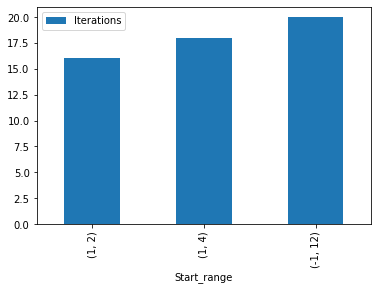

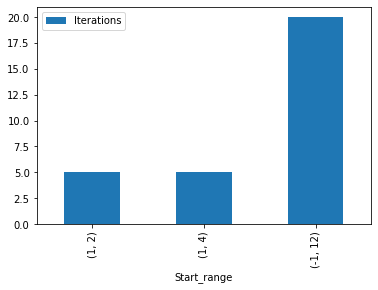

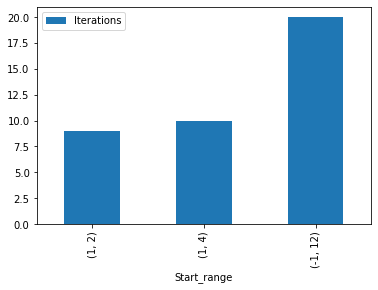

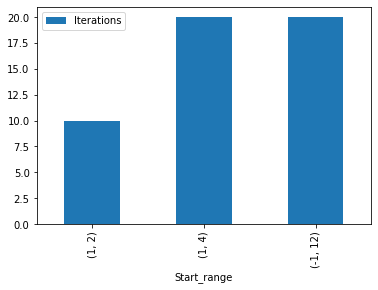

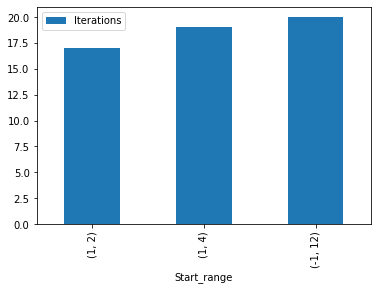

In [32]:
for i in all_methods:
    df_f1 = df[df["Function"] == "f1"]
    df_f1 = df_f1[df_f1["Method"] == i.__name__]
    df_f1.plot(kind='bar', x='Start_range',y='Iterations')

In [35]:
def f5(x):
    return 3*x**2 - 1

def secant(f, x0, x1, tolerance, maxiter):
    iterations = 0
    while iterations < maxiter:
        if abs(f(x0)) > abs(f(x1)):
            x0, x1 = x1, x0
        if abs(f(x1)-f(x0)) <= tolerance*f(x1):
            return x1, iterations
        x1 = x1 - ((x1-x0)/(f(x1)-f(x0))) * f(x1)
        iterations += 1
    return x1, iterations

secant(f5, 0, 4, 0.00005, 20)

(0.5773502691896257, 14)

why does this algo use inverse quadratic interpolation  instead of linear int like the secant method does?
check advantages etc.
implement this

Overall the secant method does not always converge and the bisection method does.
If secant method converges this wil often be faster than the bissection method. 
Newton raphson does not guarantee convergence but when it does converrge then this will be fast.
Deciding what starting values to use is not so easy.